# Predicting Next-Month Excess Returns with ML

In this notebook, we train machine learning models to predict next-month excess returns for a set of stocks. 

We use the feature matrix created in the ml_features notebook which includes:

- Momentum indicators (`12-1`, `6-1`, `3-1`)
- 3-month rolling volatility
- Lagged Fama-French 5 factors

We compare the performance of three models:
- Linear Regression
- Random Forest Regressor
- XGBoost Regressor

R²: -0.2538394511906015
MSE: 0.011532806507899838
y_test mean: 0.03783213784293213
y_pred mean: -0.010491452219582255


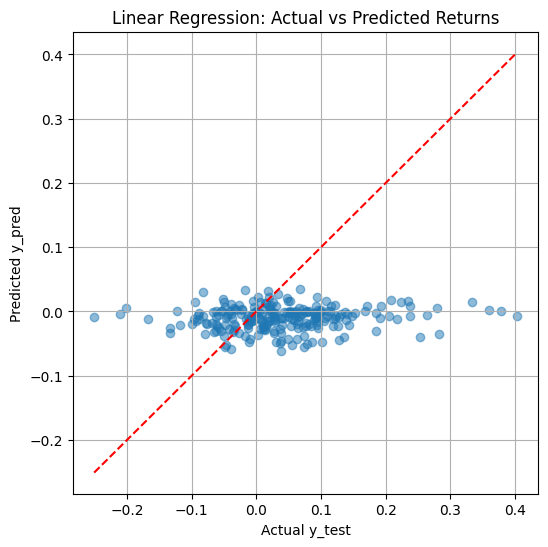

Mkt-RF_lag1     -0.069231
HML_lag1        -0.045500
vol_3m          -0.037657
RMW_lag1        -0.005122
momentum_3_1     0.004565
CMA_lag1         0.012648
RF_lag1          0.016934
momentum_12_1    0.020013
SMB_lag1         0.031744
momentum_6_1     0.035059
y_next           1.000000
Name: y_next, dtype: float64


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv("../data/processed/ml_feature_matrix.csv", index_col=[0, 1], parse_dates=[0])
data = data.dropna()

X = data.drop(columns=["y_next"])
X = X.drop(columns=["key_0"])
y = data["y_next"]

# sort by date + split based on time
dates = X.index.get_level_values(0).sort_values().unique()
split_point = int(len(dates) * 0.8)
train_dates = dates[:split_point]
test_dates = dates[split_point:]

X_train = X.loc[X.index.get_level_values(0).isin(train_dates)]
X_test  = X.loc[X.index.get_level_values(0).isin(test_dates)]
y_train = y.loc[X_train.index]
y_test  = y.loc[X_test.index]

# train Linear Regression
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

print("y_test mean:", y_test.mean())
print("y_pred mean:", y_pred.mean())

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual y_test")
plt.ylabel("Predicted y_pred")
plt.title("Linear Regression: Actual vs Predicted Returns")
plt.grid(True)
plt.show()

corrs = data.corr(numeric_only=True)["y_next"].sort_values()
print(corrs)